# Задача:
Выполнить классификацию изображений на наборе notMNIST_small. Есть блокнот как загрузить с учетом того что вы уже изучили.  
Используйте BN и коллбеки.

In [1]:
from keras import models
from keras import optimizers
from keras import layers
from keras.metrics import AUC
from matplotlib import pyplot as plt
import numpy as np
import tarfile
import os, shutil
import cv2

In [ ]:
# fname = 'notMNIST_small.tar.gz'    # распаковываем данные
# if fname.endswith("tar.gz"):
#     tar = tarfile.open(fname, "r:gz")
#     tar.extractall()
#     tar.close()

In [2]:
base_dir = './notMNIST_small'   # директорий для сохранения выделенного небольшого набора данных

In [3]:
os.listdir(f'{base_dir}/A')[:5]   # смотрим вид названия файлов

['MDEtMDEtMDAudHRm.png',
 'MDRiXzA4LnR0Zg==.png',
 'MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png',
 'MlJlYmVsc0RldXgtQmxhY2sub3Rm.png',
 'MlRvb24gU2hhZG93LnR0Zg==.png']

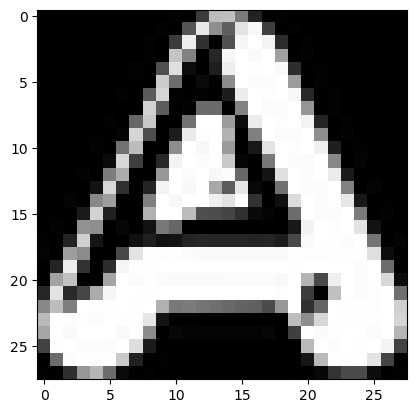

In [4]:
img = cv2.imread("./notMNIST_small/A/Q2FwdGFpbiBTaGluZXIudHRm.png")    # смотрим вид изображения
plt.imshow(img)
plt.show()

In [5]:
folders = 'ABCDEFGHIJ'    # имеющиеся буквы
for folder in folders:
  print(f"total {folder} images: {len(os.listdir(f'{base_dir}/{folder}'))}")    # смотрим количество данных каждого класса

total A images: 1873
total B images: 1873
total C images: 1873
total D images: 1873
total E images: 1873
total F images: 1873
total G images: 1872
total H images: 1872
total I images: 1872
total J images: 1872


In [7]:
imgs = []
labels = []
for folder in folders:    # каждая папка с буквами
  for img in os.listdir(base_dir + f"/{folder}"):   # каждая буква
    if img.endswith('.png'):    # только png
      try:    # если удалось прочитать 
        imgs.append(cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0])   # добавляем изображение
        if not np.all(cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0] ==cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0][0]):
            imgs.append(cv2.imread(base_dir + f"/{folder}/{img}")[:, :, 0])
            labels.append(folder)   # добавляем метку класса
      except:   # если возникла ошибка при чтении
        print(base_dir + f"/{folder}/{img}")     # выводим название изображение, которое не удалось прочитать
        continue
imgs = np.array(imgs).astype('float32')/255.    # масштабируем признаки

./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png
./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png


In [8]:
def to_categorical(labels):
  """
  This function convert the latter into a categorical shape(view)
  labels: this param consists of the letters which will convert
  Example: labels -> ['A', 'B'] -> [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]] 
  """
  categories = 'ABCDEFGHIJ'
  new_labels = np.zeros(shape=(len(labels), len(categories)))
  for i, label in enumerate(labels):
    new_labels[i][categories.find(label)] = 1 
  return new_labels

A
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


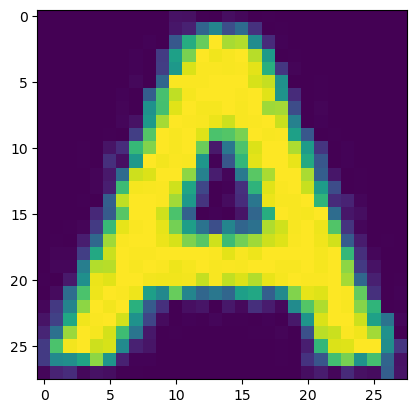

In [9]:
print(labels[0])    # выводим пример изображения с меткой
labels = to_categorical(labels)
plt.imshow(imgs[0])
print(labels[0])

In [14]:
indices = np.arange(labels.shape[0])    # перемешиваем данные
np.random.shuffle(indices)
imgs = imgs[indices]
labels = labels[indices]

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


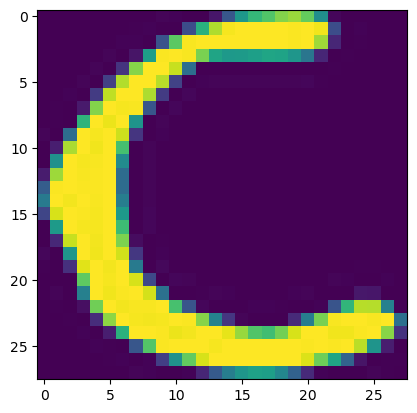

In [16]:
plt.imshow(imgs[0])
print(labels[0])

In [12]:
print("Images shape: ", imgs.shape)   # выводим размеры датасета
print("Labels shape: ", labels.shape)

Images shape:  (18442, 28, 28)
Labels shape:  (18442, 10)


In [27]:
# разбиваем на тестовую и тренировочную выборку
X_test = imgs[:1500]
y_test = labels[:1500]
X_train = imgs[1500:]
y_train = labels[1500:]
print("Train images shape: ", X_train.shape)
print("Test images shape: ", X_test.shape)
print("Train labels shape: ", y_train.shape)
print("Test labels shape: ", y_test.shape)

Train images shape:  (16942, 28, 28)
Test images shape:  (1500, 28, 28)
Train labels shape:  (16942, 10)
Test labels shape:  (1500, 10)


In [29]:
# Добавим валидационную выборку
X_valid, X_train = X_train[:3000], X_train[3000:]
y_valid, y_train = y_train[:3000], y_train[3000:]
print("Train images shape: ", X_train.shape)
print("Valid images shape: ", X_valid.shape)
print("Train labels shape: ", y_train.shape)
print("Valid labels shape: ", y_valid.shape)

Train images shape:  (10942, 28, 28)
Valid images shape:  (3000, 28, 28)
Train labels shape:  (10942, 10)
Valid labels shape:  (3000, 10)


In [236]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1200, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Activation("relu"),
    keras.layers.Dense(600, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [237]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model_{epoch}_{loss}.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)
history2 = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    batch_size=64,
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
166/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4382 - loss: 1.3770

171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4397 - loss: 1.3679 - val_accuracy: 0.5310 - val_loss: 0.8939
Epoch 2/100
168/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5475 - loss: 0.9005

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5473 - loss: 0.9005 - val_accuracy: 0.5543 - val_loss: 0.8456
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5691 - loss: 0.8511 - val_accuracy: 0.5740 - val_loss: 0.8494
Epoch 4/100
169/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5851 - loss: 0.8195

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5850 - loss: 0.8195 - val_accuracy: 0.5730 - val_loss: 0.8241
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6093 - loss: 0.7791

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6093 - loss: 0.7792 - val_accuracy: 0.5813 - val_loss: 0.8083
Epoch 6/100
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6151 - loss: 0.7695

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6150 - loss: 0.7695 - val_accuracy: 0.6083 - val_loss: 0.7783
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6308 - loss: 0.7386 - val_accuracy: 0.5963 - val_loss: 0.7891
Epoch 8/100
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6372 - loss: 0.7182

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6371 - loss: 0.7184 - val_accuracy: 0.6080 - val_loss: 0.7675
Epoch 9/100
164/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6511 - loss: 0.6979

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6509 - loss: 0.6987 - val_accuracy: 0.6267 - val_loss: 0.7556
Epoch 10/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6648 - loss: 0.6766 - val_accuracy: 0.6247 - val_loss: 0.7564
Epoch 11/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6605 - loss: 0.6754 - val_accuracy: 0.6050 - val_loss: 0.7669
Epoch 12/100
167/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6696 - loss: 0.6584

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6697 - loss: 0.6585 - val_accuracy: 0.6360 - val_loss: 0.7288
Epoch 13/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6914 - loss: 0.6444 - val_accuracy: 0.6337 - val_loss: 0.7412
Epoch 14/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6927 - loss: 0.6202 - val_accuracy: 0.6370 - val_loss: 0.7315
Epoch 15/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6976 - loss: 0.6170 - val_accuracy: 0.6497 - val_loss: 0.7414
Epoch 16/100
161/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7011 - loss: 0.6133

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7007 - loss: 0.6137 - val_accuracy: 0.6457 - val_loss: 0.7116
Epoch 17/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7197 - loss: 0.5794 - val_accuracy: 0.6380 - val_loss: 0.7476
Epoch 18/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7128 - loss: 0.5827 - val_accuracy: 0.6523 - val_loss: 0.7171
Epoch 19/100
170/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7243 - loss: 0.5676

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7242 - loss: 0.5678 - val_accuracy: 0.6637 - val_loss: 0.7043
Epoch 20/100
166/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7309 - loss: 0.5640

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7306 - loss: 0.5644 - val_accuracy: 0.6680 - val_loss: 0.7005
Epoch 21/100
164/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7290 - loss: 0.5555

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7288 - loss: 0.5560 - val_accuracy: 0.6653 - val_loss: 0.6995
Epoch 22/100
165/171 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7341 - loss: 0.5427

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7338 - loss: 0.5431 - val_accuracy: 0.6740 - val_loss: 0.6913
Epoch 23/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7392 - loss: 0.5351 - val_accuracy: 0.6747 - val_loss: 0.7012
Epoch 24/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7430 - loss: 0.5359 - val_accuracy: 0.6720 - val_loss: 0.7143
Epoch 25/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7431 - loss: 0.5216 - val_accuracy: 0.6840 - val_loss: 0.7009
Epoch 26/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7482 - loss: 0.5227 - val_accuracy: 0.6883 - val_loss: 0.6967
Epoch 27/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7606 - loss: 0.5048 - val_accuracy: 0.6730 - val_loss: 0.7174


In [238]:
# Оценка модели на тестовых данных
loss2, accuracy2 = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss2}')
print(f'Test Accuracy: {accuracy2}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7036 - loss: 0.6569 
Test Loss: 0.6461747884750366
Test Accuracy: 0.7053333520889282


Вывод:
Удалось добиться следующих метрик: 
Test Loss: 0.6461747884750366
Test Accuracy: 0.7053333520889282